## Practica 2



In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
plt.rcParams['figure.autolayout'] = True   
df = pd.read_csv('Datos.csv')
df.head()


[nltk_data] Downloading package punkt to /home/lets/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/lets/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues


In [ ]:
# Eliminar duplicados
df = df.drop_duplicates()

# Ratings a float
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Duración a horas
df['Hours'] = df['Duration'].str.extract(r'(\d+\.?\d*)').astype(float)

# No. de reseñas
df['Reviews'] = (df['Review']
                 .str.replace('[^0-9]', '', regex=True)
                 .replace('', np.nan)
                 .astype(float))

# Nivel a categoría ordenada
niveles = ['Beginner level', 'Intermediate level', 'Mixed', 'Advanced level']
df['Level'] = pd.Categorical(df['Level'], categories=niveles, ordered=True)
df.head()


,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Hours,Reviews
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813.0
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100.0
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227.0
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,NaN
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582.0


# Análisis

In [49]:
# Calificaciones promedio por curso. 
promedios = (
    df.groupby('Course Title')['Rating']
      .mean()
      .sort_values(ascending=False)
)

promedios.head(10)


Course Title
Natural Disaster and Climate Change Risk Assessment Specialization            5.0
Uncommon Sense Teaching: Teaching Online                                      5.0
Compreendendo o Zika e doenças emergentes                                     5.0
Compromiso del paciente: resultados clínicos satisfactorios Specialization    5.0
Tecnologías para la Innovación Educativa                                      5.0
Generative AI for Software Developers Specialization                          5.0
Keller Williams Real Estate Agent Professional Certificate                    5.0
Keamanan IT: Pertahanan terhadap Kejahatan Digital                            5.0
Exploring Beethoven’s Piano Sonatas Part 2                                    5.0
Back-end Application Development Capstone Project                             5.0
Name: Rating, dtype: float64

In [50]:
# Curso con mayor y menor rating
curso_max = df.loc[df['Rating'].dropna().idxmax(),
                   ['Course Title', 'Rating']]
curso_min = df.loc[df['Rating'].dropna().idxmin(),
                   ['Course Title', 'Rating']]

print(f"Rating máximo → {curso_max['Course Title']} "
      f"({curso_max['Rating']})")
print(f"Rating mínimo → {curso_min['Course Title']} "
      f"({curso_min['Rating']})")


Rating máximo → Songwriting: Writing the Music (5.0)
Rating mínimo → Excel for Beginners: Beginner Functions (1.5)


In [51]:
# Porcentaje de cursos con horario flexible
pct_flex = (
    df['Schedule'].str.contains('Flexible', na=False).mean()*100
).round(2)

print(f"Porcentaje de cursos con horario flexible: {pct_flex}%")


Porcentaje de cursos con horario flexible: 92.63%


# Visualizaciones

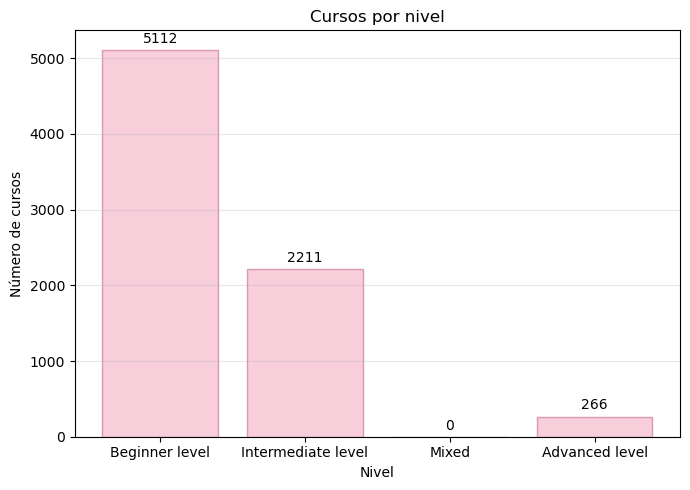

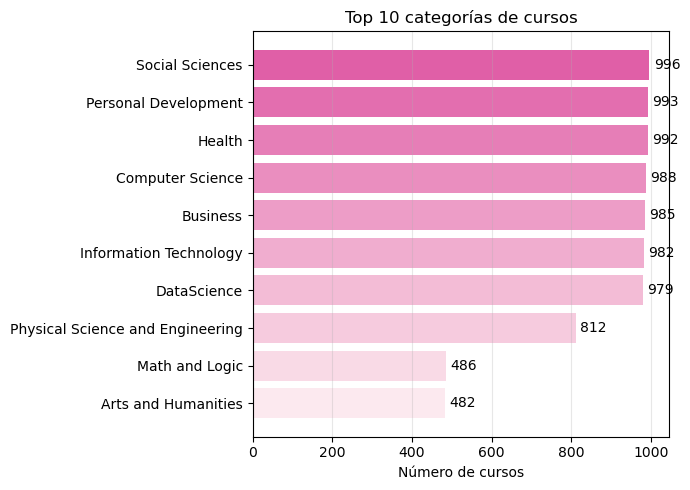

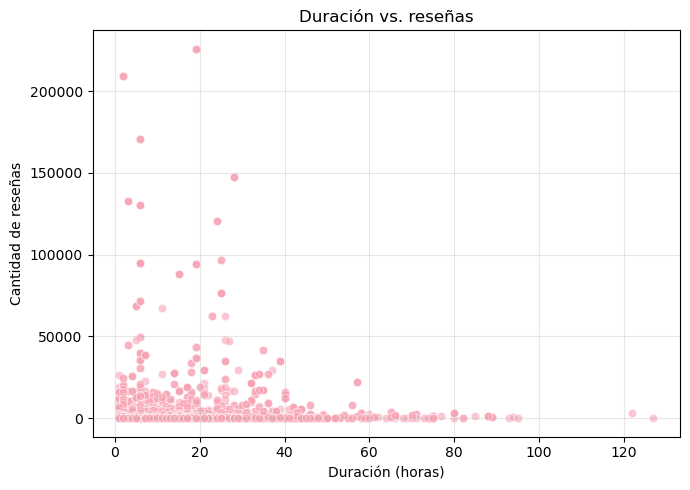

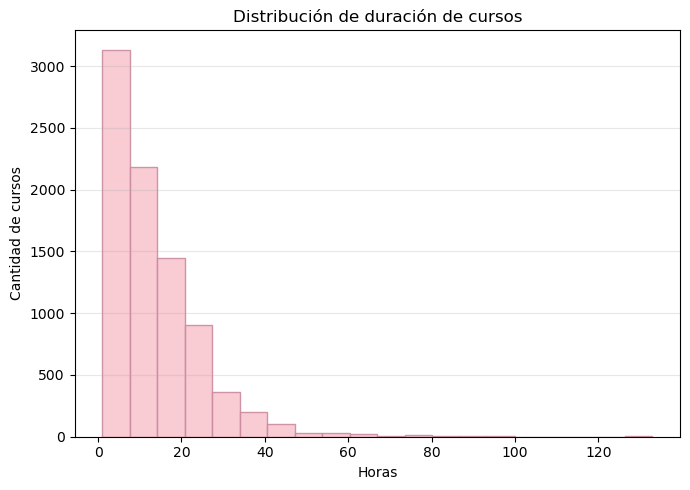

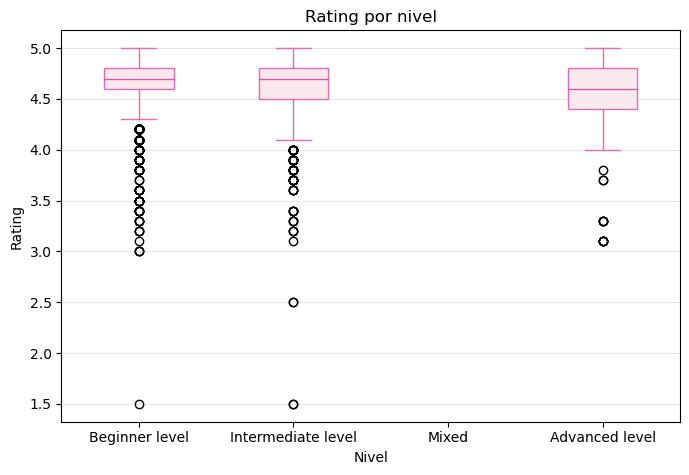

In [52]:
# 1. Barras – cursos por nivel
fig, ax = plt.subplots(figsize=(7, 5))
niveles_order = ['Beginner level', 'Intermediate level', 'Mixed', 'Advanced level']
counts = df['Level'].value_counts().reindex(niveles_order).dropna()

pastel = '#F8CEDB'      
bars = ax.bar(counts.index, counts.values, color=pastel, edgecolor='#D89AAE')

ax.set_xlabel('Nivel')
ax.set_ylabel('Número de cursos')
ax.set_title('Cursos por nivel')
ax.grid(axis='y', alpha=.3)

for bar in bars:
    ax.annotate(bar.get_height(),
                xy=(bar.get_x() + bar.get_width()/2, bar.get_height()),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. Barras horizontales – Top 10 categorías
fig, ax = plt.subplots(figsize=(7, 5))
top_kw = df['Keyword'].value_counts().nlargest(10).sort_values()

palette = ['#FCE9EF', '#F9DAE6', '#F6CBDE', '#F3BCD6', '#F0ADCf',
           '#ED9DC7', '#EA8EBF', '#E67EB7', '#E36EAF', '#E05FA7']

bars = ax.barh(top_kw.index, top_kw.values, color=palette)

ax.set_title('Top 10 categorías de cursos')
ax.set_xlabel('Número de cursos')
ax.grid(axis='x', alpha=.3)

for bar in bars:
    ax.annotate(bar.get_width(),
                xy=(bar.get_width(), bar.get_y() + bar.get_height()/2),
                xytext=(3, 0),
                textcoords='offset points',
                va='center')
plt.tight_layout()
plt.show()

# 3. Dispersión – duración vs. reseñas
fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(df['Hours'], df['Reviews'],
           color='#F7A3B4', alpha=.6, edgecolors='white', linewidth=.5)

ax.set_xlabel('Duración (horas)')
ax.set_ylabel('Cantidad de reseñas')
ax.set_title('Duración vs. reseñas')
ax.grid(alpha=.3)
plt.tight_layout()
plt.show()

# 4. Histograma de duración
fig, ax = plt.subplots(figsize=(7, 5))
ax.hist(df['Hours'].dropna(), bins=20,
        color='#F9C6CF', edgecolor='#C98A9F', alpha=.9)

ax.set_xlabel('Horas')
ax.set_ylabel('Cantidad de cursos')
ax.set_title('Distribución de duración de cursos')
ax.grid(axis='y', alpha=.3)
plt.tight_layout()
plt.show()

# 5. Boxplot – rating por nivel (relleno rosa claro)
fig, ax = plt.subplots(figsize=(7, 5))
box = df.boxplot(column='Rating', by='Level', ax=ax, grid=False,
                 patch_artist=True, return_type='dict')

for patch in box['Rating']['boxes']:
    patch.set(facecolor='#FCE9EF', edgecolor='#E36EAF')
for whisk in box['Rating']['whiskers']:
    whisk.set(color='#E36EAF')
for cap in box['Rating']['caps']:
    cap.set(color='#E36EAF')
for median in box['Rating']['medians']:
    median.set(color='#D15D9E')

ax.set_title('Rating por nivel')
plt.suptitle('')
ax.set_xlabel('Nivel')
ax.set_ylabel('Rating')
ax.grid(axis='y', alpha=.3)
plt.tight_layout()
plt.show()

# Analisis NLP

In [27]:
with open('Coursera Comments.txt', encoding='utf-8') as f:
    comments = f.read()

tokens = word_tokenize(comments.lower(), language='spanish')
spanish_stop = set(stopwords.words('spanish'))
tokens_clean = [t for t in tokens if t.isalpha() and t not in spanish_stop]


In [28]:
stemmer = SnowballStemmer('spanish')
stems = [stemmer.stem(t) for t in tokens_clean]

In [29]:
from collections import Counter
freq = Counter(stems)
top20 = freq.most_common(20)
print(top20)

[('seman', 1718), ('curs', 1495), ('particip', 1355), ('portafoli', 1208), ('dud', 988), ('abiert', 970), ('ta', 836), ('activ', 823), ('trabaj', 814), ('educ', 797), ('evalu', 781), ('for', 764), ('hac', 747), ('deb', 662), ('si', 641), ('entreg', 634), ('compañer', 629), ('pued', 563), ('realiz', 484), ('cre', 469)]


In [30]:
import re
organizaciones = re.findall(r'Universidad [A-Z][a-zÁÉÍÓÚ]+(?:\s[A-Z][a-zÁÉÍÓÚ]+)*', comments)
set(organizaciones)

{'Universidad Carnegie Mellon\nUniversidad Case Western Reserve\nCentrale',
 'Universidad Cat',
 'Universidad China',
 'Universidad Corporativa',
 'Universidad Duke',
 'Universidad Emory\nUniversidad Erasmus',
 'Universidad Estatal',
 'Universidad Estatal Nacional',
 'Universidad George Washington\nUniversidad Cient',
 'Universidad Hebrea',
 'Universidad Johns Hopkins\nUniversidad',
 'Universidad Mc',
 'Universidad Nacional',
 'Universidad Nacional Aut',
 'Universidad Northwestern\nUniversidad Northwestern\nUniversidad Estatal',
 'Universidad Nuclear',
 'Universidad Polit',
 'Universidad Rice\nUniversidad Rutgers',
 'Universidad Tecnol',
 'Universidad Tufts\nUnity\nUniversidad Austral\nUniversidad',
 'Universidad Vanderbilt\nYandex',
 'Universidad Wesleyana\nUniversidad',
 'Universidad Xi',
 'Universidad Yeshiva\nUniversidad Yonsei'}